In [1]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 218M/218M [00:11<00:00, 18.9MB/s]
100% 218M/218M [00:11<00:00, 20.1MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/training_set/training_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test_set/test_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 294ms/step - accuracy: 0.7951 - loss: 0.4677 - val_accuracy: 0.8878 - val_loss: 0.2645
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 266ms/step - accuracy: 0.8843 - loss: 0.2739 - val_accuracy: 0.9046 - val_loss: 0.2428
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 264ms/step - accuracy: 0.9012 - loss: 0.2354 - val_accuracy: 0.8962 - val_loss: 0.2572
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 265ms/step - accuracy: 0.9053 - loss: 0.2229 - val_accuracy: 0.9026 - val_loss: 0.2318
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 265ms/step - accuracy: 0.9146 - loss: 0.1914 - val_accuracy: 0.9095 - val_loss: 0.2285
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 262ms/step - accuracy: 0.9223 - loss: 0.1860 - val_accuracy: 0.9061 - val_loss: 0.2575
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 266ms/step - accuracy: 0.9261 - loss: 0.1796 - val_accuracy: 0.9031 - val_loss: 0.2381
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 269ms/step - accuracy: 0.9320 - loss: 0

In [16]:
# prompt: find test train accuracy

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1]*100)
print("Validation Accuracy:", val_accuracy[-1]*100)

Train Accuracy: 92.80449748039246
Validation Accuracy: 90.1631236076355


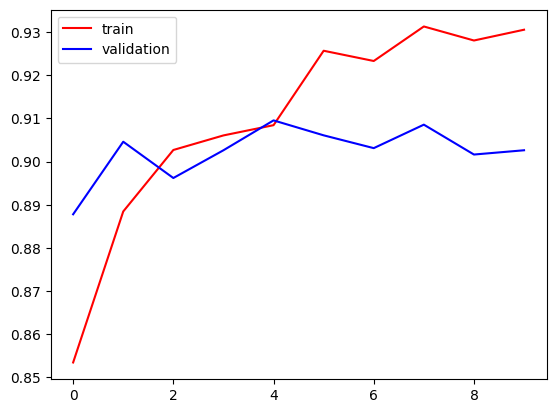

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

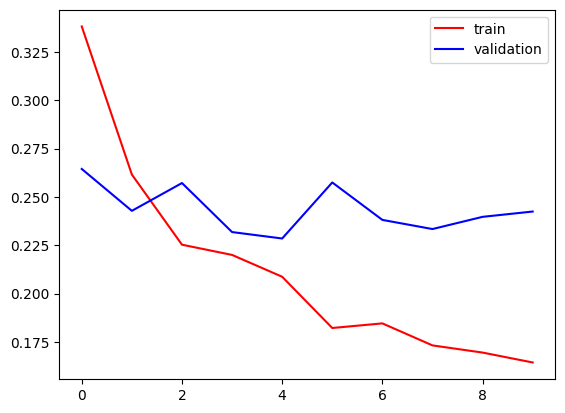

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()